# Healthcare Dataset for Stroke 


**Dataset Description:**
This dataset contains information about patients of different age and gender with and without a history of stroke, including their ID, gender, work type, smoking status, age, hypertension, heart disease, marital status, residence type, average glucose level, and BMI. This data has been taken from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. A stroke is a medical emergency that occurs when the blood supply to the brain is disrupted, either due to a blockage in an artery or a ruptured blood vessel. This results in a lack of oxygen and nutrients to the brain cells, leading to their death.

*Dataset Detail: This dataset contains 5110 records and has following features

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient 
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes" 
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood 
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
* stroke: 1 if the patient had a stroke or 0 if not 

Note: "Unknown" in smoking_status means that the information is unavailable for this patient


### Purpose of this analysis: 
#### Given clinical and personal parameters about a patient, can we predict whether or not the patient had a stroke?
#### What is the impact of age of a person on stroke?
#### How bmi can be related to stroke


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

### Data Exploration

In [103]:
#reading & printing data from csv file and making a dataframe Data

Data = pd.read_csv("healthcare-dataset-stroke-data.csv")
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
#printing all the columns
Data.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [105]:
Data.shape


(5110, 12)

In [106]:
#finding missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### We can see from above table that bmi column has missing values and we will treat these in data prepration before our model training

In [107]:
#describing data
Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [108]:
#droping id column as we don't need it in our analysis
Data.drop(['id'], axis='columns', inplace=True)
Data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Visualisation of data

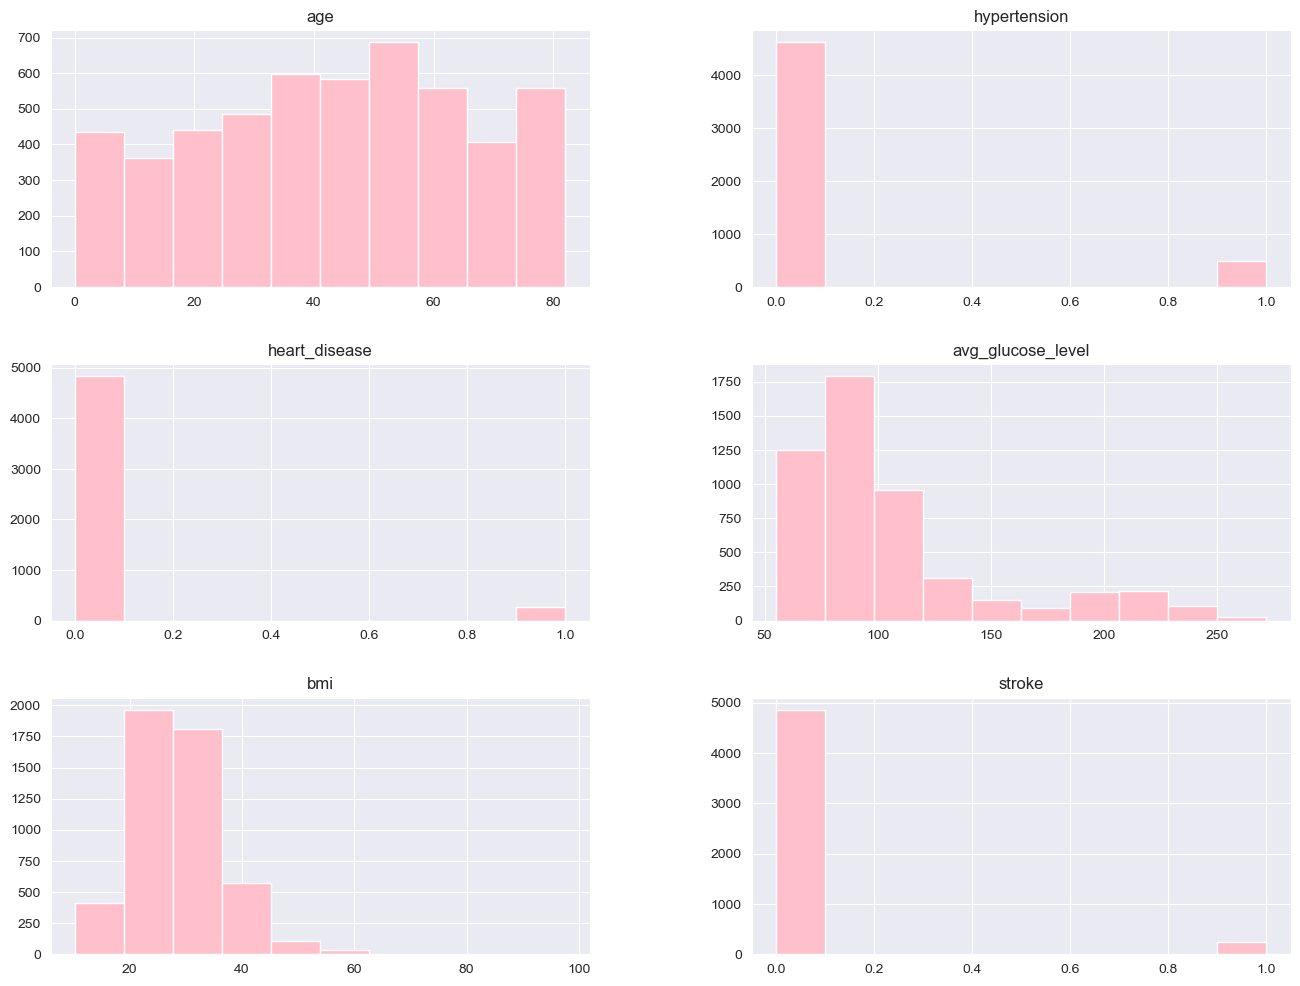

In [109]:
Data.hist(bins=10 ,figsize=(16,12), color = 'Pink')
plt.show()

#### Visualisation of categorical variables with respect to stroke


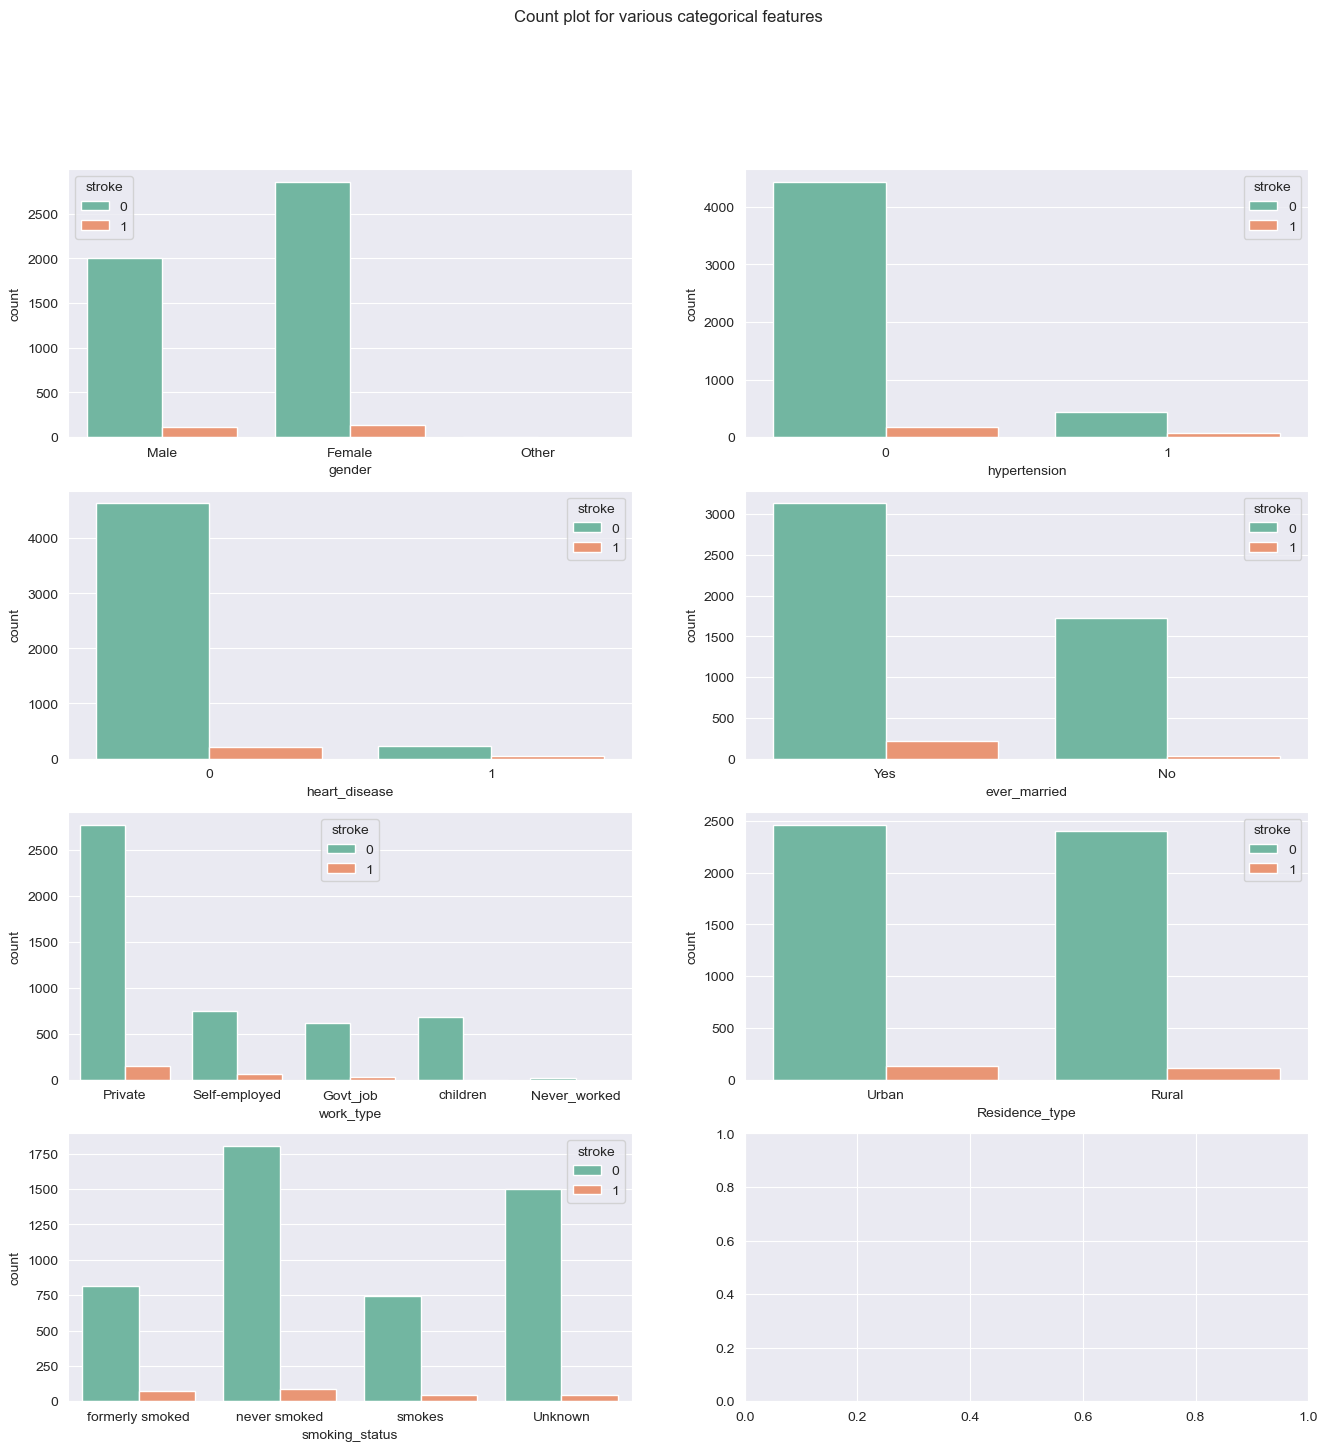

In [110]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=Data,x='gender', hue=Data['stroke'])
sns.countplot(ax=axes[0,1],data=Data,x='hypertension', hue=Data['stroke'])
sns.countplot(ax=axes[1,0],data=Data,x='heart_disease', hue=Data['stroke'])
sns.countplot(ax=axes[1,1],data=Data,x='ever_married', hue=Data['stroke'])
sns.countplot(ax=axes[2,0],data=Data,x='work_type', hue=Data['stroke'])
sns.countplot(ax=axes[2,1],data=Data,x='Residence_type', hue=Data['stroke'])
sns.countplot(ax=axes[3,0],data=Data,x='smoking_status', hue=Data['stroke'])


plt.show()

#### We can see from the above plots that married people shows more frequency of stroke than unmarried
#### also people who are employed in private sector also shows significant number of strokes
#### we can see that type of resience is has no significant affect on number of strokes as urban and rural both shows almost same stroke frequency

In [111]:
corr_matrix = Data.corr()
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


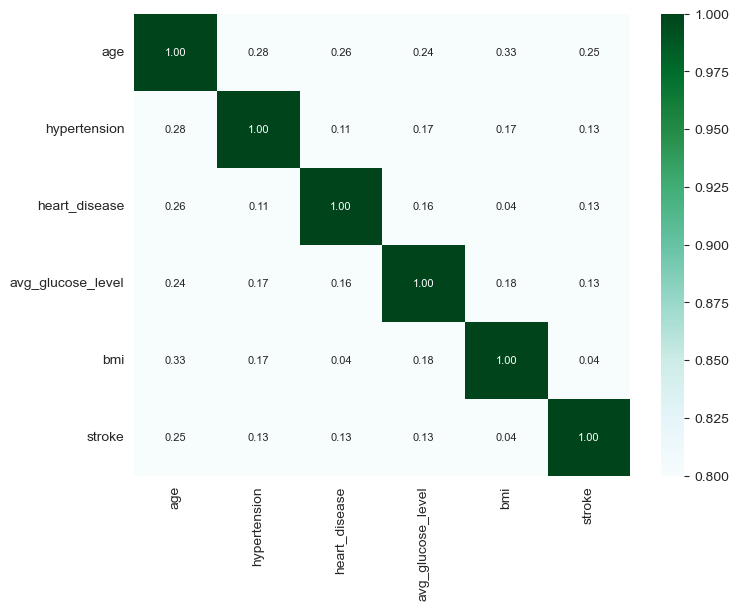

In [112]:
#creating heatmap
plt.figure(figsize= (8, 6))



#generating heatmap
sns.heatmap(corr_matrix, vmin = 0.8, vmax = 1,  annot = True, fmt=".2f", annot_kws={"size":8}, cmap='BuGn')

plt.xticks(fontsize=10, rotation= 90)
plt.yticks(fontsize=10)

plt.show()

#### The heat map demonstrates the strong correlation between age, hypertension, and avg_glucose_level with the risk of stroke. While hypertension and average glucose level have somewhat lesser positive relationships, age has a clear positive link with stroke. The connections between gender, cardiac disease, and smoking status and stroke are weaker. Stroke and no factors have a negative correlation.

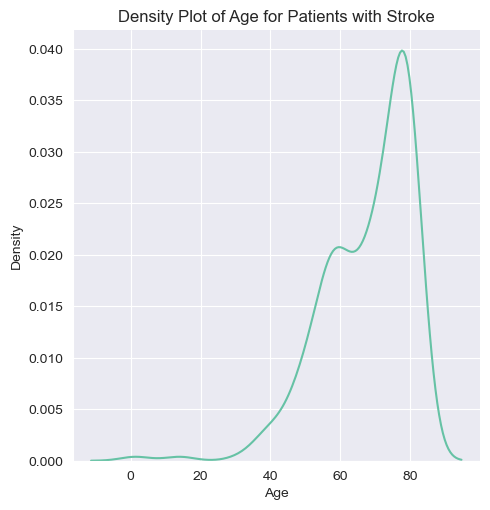

In [113]:
# Relationship of stroke(when someone had stroke i.e stroke = 1) and age:
stroke = Data[Data['stroke']==1]

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.displot(stroke.age, kind='kde')

plt.title('Density Plot of Age for Patients with Stroke')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

As it is evident from the above density plot that with increasing age of a person the possibility to have a stroke increases which is a positive correlation which is also backed up by the correlation between the two.

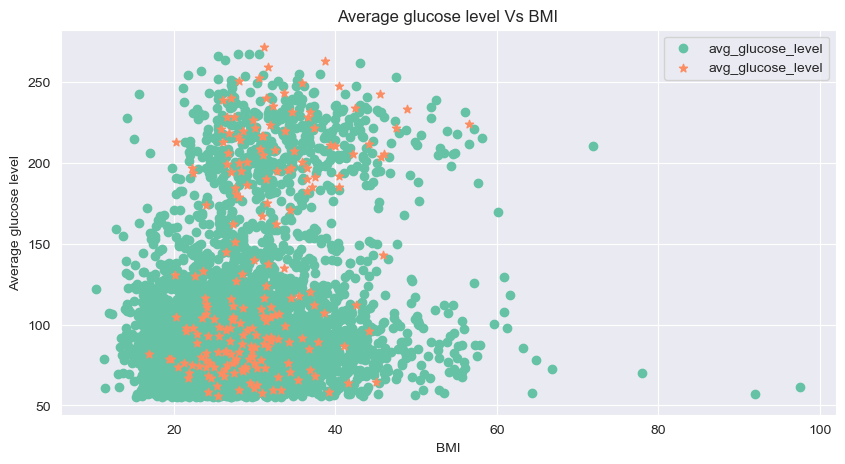

In [114]:
#trying to find bmi of patients who had a stroke
plt.figure(figsize=(10,5))
plt.scatter(x='bmi',y='avg_glucose_level', data=Data[Data['stroke']==0])
plt.scatter(x='bmi',y='avg_glucose_level', data=Data[Data['stroke']==1], marker='*')

plt.xlabel('BMI')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs BMI')
plt.legend()
plt.show()

We can see from the above scatter plot that people with maximum possibility to have a stroke has bmi between 20 to 40 with varying glucose level.

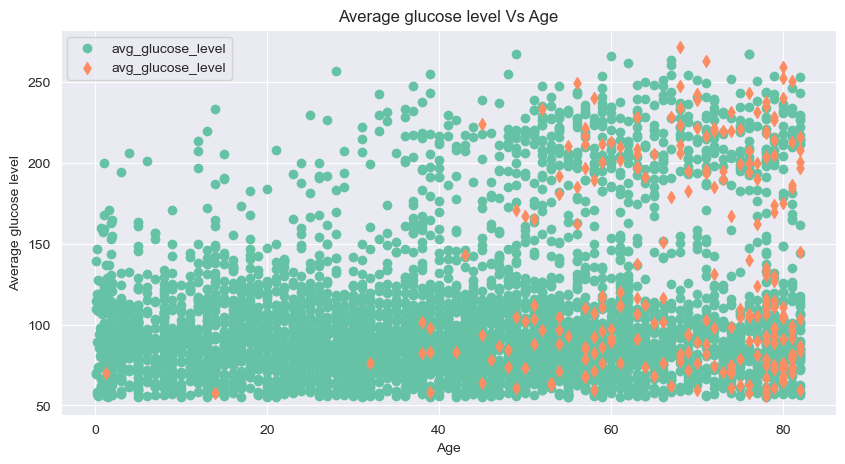

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(x='age',y='avg_glucose_level', data=Data[Data['stroke']==0])
plt.scatter(x='age',y='avg_glucose_level', data=Data[Data['stroke']==1], marker='d')

plt.xlabel('Age')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs Age')
plt.legend()
plt.show()

### Data Prepration

In [116]:
#filling the missing value in bmi
Data['bmi'].fillna(Data['bmi'].median(), inplace = True)


In [117]:
#checking for missing values again
Data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

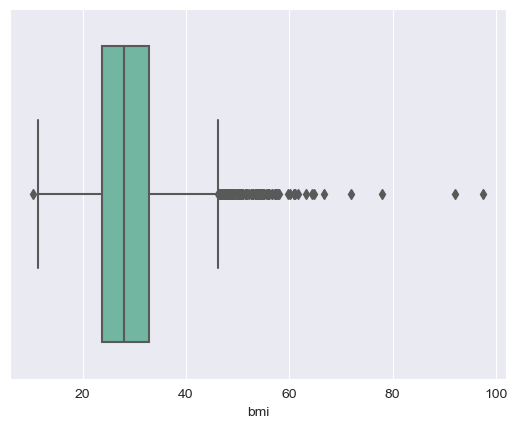

In [118]:
#checking for outliers using boxplot
sns.boxplot(Data['bmi'])
plt.show()


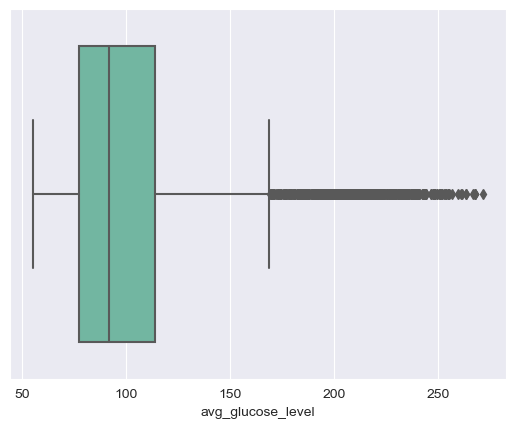

In [119]:
sns.boxplot(Data['avg_glucose_level'])
plt.show()

In [120]:
#finding Q1, Q2 to remove outliers

Q1 = Data['bmi'].quantile(0.25)
Q3 = Data['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
print(Q1)

8.999999999999996
32.8
23.8


In [121]:
#removing all the outlier from the dataframe

Data_without_outliers = Data[~((Data['bmi'] < (Q1 - 1.5 * IQR)) |(Data['bmi'] > (Q3 + 1.5 * IQR)))]
Data_without_outliers.shape

(4984, 11)

In [122]:
#finding categorical columns in the dataset

ctg_cols = list(Data_without_outliers.select_dtypes(include=['object']).columns)
ctg_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [123]:
# transforming categorical data to numerical  "using oneHot encoder"

new_data = pd.get_dummies(Data_without_outliers, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first = True)
new_data


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [124]:
#shape of data before cleaning
Data.shape


(5110, 11)

In [125]:
#shape of data after cleaning
new_data.shape

(4984, 17)

In [126]:
#normalizing data using minmaxscaler

scaler = MinMaxScaler((0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(new_data)

# Creating a new DataFrame with the scaled data
normalized_data = pd.DataFrame(scaled_data, columns=new_data.columns)
normalized_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.724928,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.481375,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.607450,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.661891,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.363897,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,0.975586,1.0,0.0,0.132167,0.481375,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4980,0.987793,0.0,0.0,0.323516,0.822350,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4981,0.426270,0.0,0.0,0.128658,0.553009,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4982,0.621582,0.0,0.0,0.513203,0.409742,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Analysis

In [127]:

# breaking our data into X and y values
X = normalized_data.drop("stroke", axis=1)
y = normalized_data["stroke"]

# Checking the shapes
X.shape, y.shape

((4984, 16), (4984,))

In [128]:
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

#make predictions
y_pred = lr.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# Evaluate the model performance

accuracy = accuracy_score(y_test, y_pred)
print("Linear regression Accuracy:", accuracy)

Linear regression Accuracy: 0.9398194583751254


In [130]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[937,   0],
       [ 60,   0]], dtype=int64)

The above confusion matrix shows that the model correctly predicted 937 samples as negative and incorrectly predicted 60 positive samples as negative. However, the model did not predict any positive samples as positive.

In [131]:
from sklearn.linear_model import LogisticRegression


# Fiting the logistic regression model to the training data
model = LogisticRegression()
model.fit(x_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(x_test)

# Evaluating the model performance

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9398194583751254


In [132]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[937,   0],
       [ 60,   0]], dtype=int64)

The above confusion matrix shows that the model correctly predicted 937 samples as negative and incorrectly predicted 60 positive samples as negative. However, the model did not predict any positive samples as positive.

In [156]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN classifier Accuracy is:", accuracy)

KNN classifier Accuracy is: 0.8966900702106319


In [157]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[891,  46],
       [ 57,   3]], dtype=int64)

The confusion matrix shows that the model correctly predicted 891 samples as negative and 3 samples as positive. However, the model incorrectly predicted 46 samples as positive and missed 57 positive samples.

### Parameter Tuning with cross validation

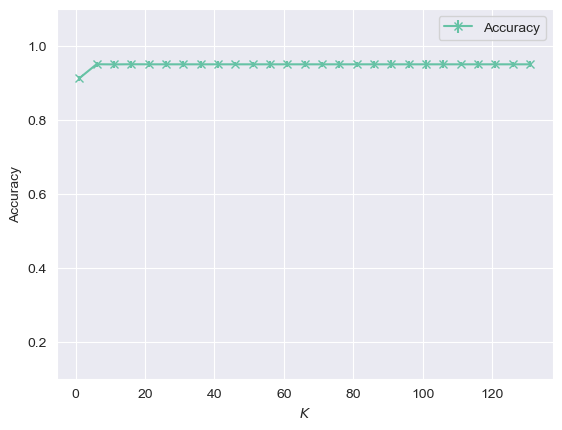

In [140]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [162]:
#using GridSearchCV to find best number for neighbors(K) that gives max accuracy

from sklearn.model_selection import GridSearchCV 
parameter_grid = {'n_neighbors': range(1, 135, 5)}

#Build the model
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV (knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits = 10, shuffle = True))
#training the model
gs_knn.fit(X, y)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 135, 5)}, scoring='accuracy')

In [163]:
#best hyperparameter value
print("Best value of K: ", gs_knn.best_params_['n_neighbors'])
print("Best ACCURACY: ", gs_knn.best_score_)


Best value of K:  6
Best ACCURACY:  0.9514478756710207


In [164]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=6)

# Train the model with the training data
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN classifier Accuracy is:", accuracy)

KNN classifier Accuracy is: 0.9398194583751254


When we used k = 6 the accuracy of model increased than it was before

In [165]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train, y_train)

y_pred = NaiveBayes.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Naive Bayes Accuracy is: ", accuracy)

Naive Bayes Accuracy is:  0.2046138415245737


In [166]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', NaiveBayes.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', NaiveBayes.theta_)
print('Estimated variance for each Gaussian distribution: \n', NaiveBayes.sigma_)

Estimated probability of classess: 
 [0.95334838 0.04665162]
Estimated mean for each Gaussian distribution: 
 [[5.09643330e-01 8.65561694e-02 4.78821363e-02 2.27813526e-01
  4.83583343e-01 4.11470666e-01 2.63088661e-04 6.37726914e-01
  3.68324125e-03 5.60378848e-01 1.64430413e-01 1.44435675e-01
  5.03025520e-01 1.66272034e-01 3.69902657e-01 1.51802157e-01]
 [8.25184812e-01 2.68817204e-01 2.04301075e-01 3.50597846e-01
  5.35431494e-01 4.67741935e-01 0.00000000e+00 8.76344086e-01
  0.00000000e+00 6.07526882e-01 2.68817204e-01 1.07526882e-02
  5.37634409e-01 2.95698925e-01 3.38709677e-01 1.61290323e-01]]
Estimated variance for each Gaussian distribution: 
 [[7.53589370e-02 7.90641992e-02 4.55894376e-02 4.01293157e-02
  3.63783919e-02 2.42162557e-01 2.63019695e-04 2.31031297e-01
  3.66967524e-03 2.46354395e-01 1.37393053e-01 1.23574011e-01
  2.49990846e-01 1.38625645e-01 2.33074682e-01 1.28758263e-01]
 [2.56268518e-02 1.96554515e-01 1.62562146e-01 7.79639794e-02
  2.27909938e-02 2.48959418

In [167]:
# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy range: [0.1727, 0.3133]; mean: 0.2051; std: 0.0387



In [168]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[144, 793],
       [  0,  60]], dtype=int64)

the confusion matrix shows that the model correctly predicted 144 samples as negative and 60 samples as positive. However, the model incorrectly predicted 793 samples as positive and missed 0 positive samples.

In [169]:
clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier(n_neighbors=13)

scores = cross_val_score(clf_gnb, X, y, scoring= 'accuracy', cv=10)
print('Guassian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' 
     % (scores.min(), scores.max(), scores.mean(), scores.std()))

scores_gnb = scores

scores = cross_val_score(clf_knn, X, y, scoring= 'accuracy', cv=10)
print('KNN Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' 
     % (scores.min(), scores.max(), scores.mean(), scores.std()))

scores_knn = scores


Guassian Naive Bayes accuracy range: [0.1727, 0.3133]; mean: 0.2051; std: 0.0387

KNN Classifier accuracy range: [0.9478, 0.9538]; mean: 0.9508; std: 0.0018



In [173]:
#visualising accuracy of different models
models = ['Linear Regression', 'Logistic Regression', 'KNN', 'zgaussian Naive Bayse']
accuracy = [0.9398194583751254, 0.9398194583751254, 0.9398194583751254, 0.2046138415245737]



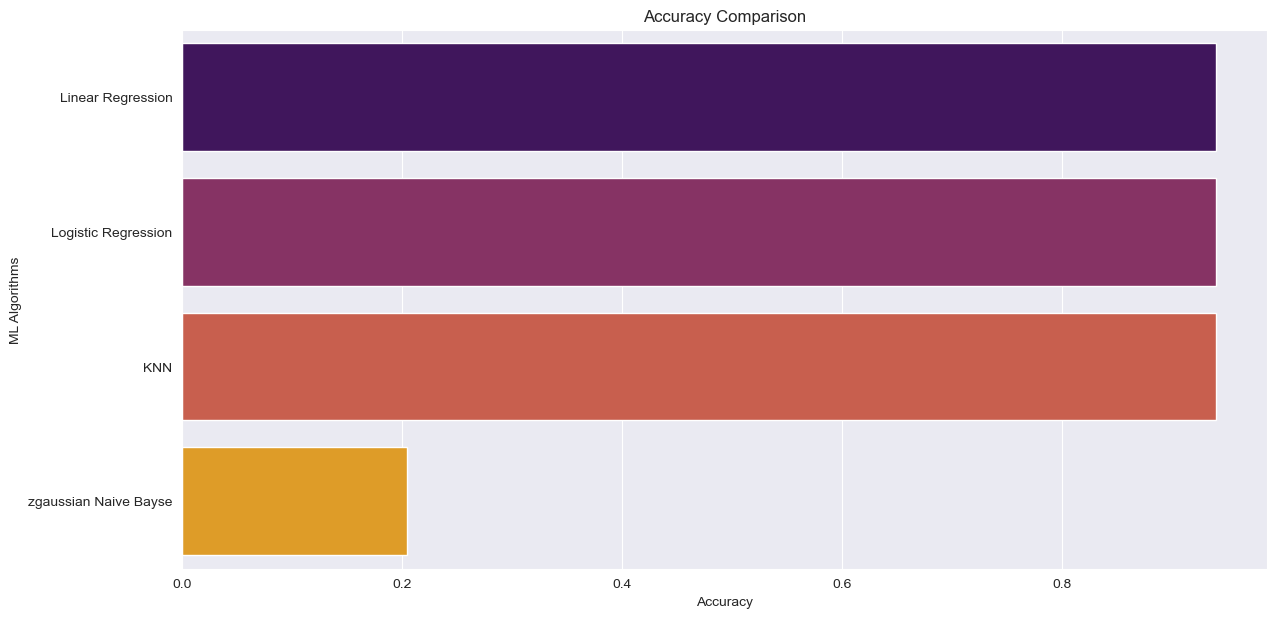

In [174]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = accuracy,y = models,palette='inferno')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')